In [20]:
#First I load the libraries that we need:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import random

#About Data:

#### The MNIST dataset

The MNIST dataset consists of a training set of 60,000 handwritten digits with corresponding labels, and a test set of 10,000 images. The images have been normalised and centred. The dataset is frequently used in machine learning research, and has become a standard benchmark for image classification models.

In [3]:
#Now I load the data from tensorflow
mnist_data = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist_data.load_data()

11490434/11490434 [==============================] - 0s 0us/step


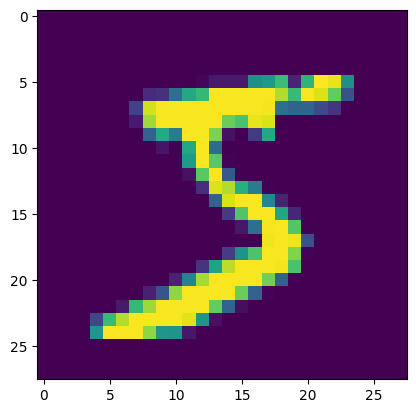

5


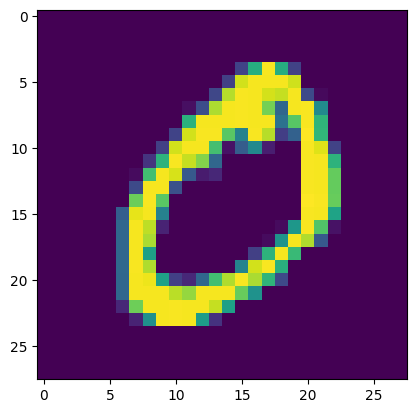

0


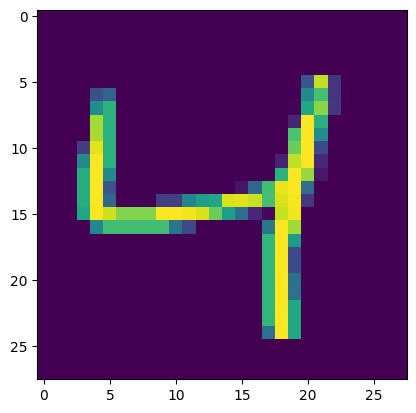

4


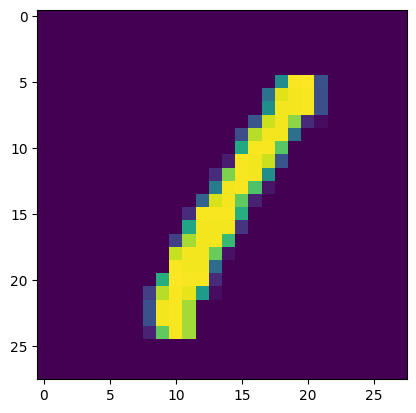

1


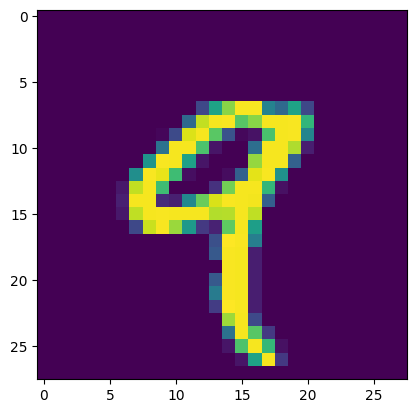

9


In [4]:
#I've written this code to display 6 of the images and their labels
i=0
for i in range(0,5):
  img=train_images[i,:,:]
  label=train_labels[i]
  plt.imshow(img)
  plt.show()
  print(label)

In [10]:
#Here is the model that I've used for the dataset, I've also used dropout to avoid overfitting
model= Sequential([
    Conv2D(50,(3,3), activation='relu', padding='same', input_shape=(28,28,1)),
    MaxPooling2D(3,3),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Conv2D(40,(3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(20,(3,3), activation='relu'),
    Dense(128,activation='relu'),
    Dense(128,activation='relu'),
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(64,activation='relu'),
    Dense(64,activation='relu'),
    Dense(10, activation='softmax')
])

In [11]:
#Let's see the summary of our model
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 50)        500       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 9, 9, 50)         0         
 2D)                                                             
                                                                 
 dense_36 (Dense)            (None, 9, 9, 128)         6528      
                                                                 
 dense_37 (Dense)            (None, 9, 9, 128)         16512     
                                                                 
 dense_38 (Dense)            (None, 9, 9, 128)         16512     
                                                                 
 conv2d_13 (Conv2D)          (None, 7, 7, 40)          46120     
                                                      

In [13]:
#I will creat an early stopping to stop the training if the validation accuracy doesnt imporve after 3 epochs
es=EarlyStopping(monitor='val_accuracy', patience=3, mode='max')

In [14]:
#We compile the model using the adam optimizer, the sparse categorical crossentropy for the loss function and accuracy as our metric
model.compile(optimizer='rmsprop',
                 loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [15]:
#I fit the model and run it for 15 epochs, I also use the validation split to check for overfitting and the early stopping mentioned above as a callback
history= model.fit(train_images, train_labels, epochs=15, validation_split=0.1, callbacks=[es])

Epoch 1/15
1688/1688 [==============================] - 31s 10ms/step - loss: 0.5211 - accuracy: 0.8355 - val_loss: 0.2795 - val_accuracy: 0.9425
Epoch 2/15
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1508 - accuracy: 0.9623 - val_loss: 0.1678 - val_accuracy: 0.9813
Epoch 3/15
1688/1688 [==============================] - 15s 9ms/step - loss: 0.1129 - accuracy: 0.9726 - val_loss: 0.0870 - val_accuracy: 0.9812
Epoch 4/15
1688/1688 [==============================] - 17s 10ms/step - loss: 0.0983 - accuracy: 0.9771 - val_loss: 0.0573 - val_accuracy: 0.9885
Epoch 5/15
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0858 - accuracy: 0.9814 - val_loss: 0.0624 - val_accuracy: 0.9863
Epoch 6/15
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0787 - accuracy: 0.9821 - val_loss: 0.0519 - val_accuracy: 0.9883
Epoch 7/15
1688/1688 [==============================] - 15s 9ms/step - loss: 0.0757 - accuracy: 0.9834 - val_loss: 0.0544 - val_

In [16]:
#I use the Pandas library to creat a data fram from the model's history so that the details of the model's performance on every epoch can be seen
df= pd.DataFrame(history.history)
df

,loss,accuracy,val_loss,val_accuracy
0,0.521067,0.835537,0.279512,0.942500
1,0.150798,0.962315,0.167801,0.981333
2,0.112876,0.972630,0.086968,0.981167
3,0.098319,0.977093,0.057271,0.988500
4,0.085804,0.981370,0.062375,0.986333
5,0.078737,0.982074,0.051854,0.988333
6,0.075697,0.983426,0.054376,0.989500
7,0.074801,0.984019,0.083826,0.988667
8,0.072285,0.985315,0.042068,0.991667
9,0.068139,0.986074,0.125431,0.987833


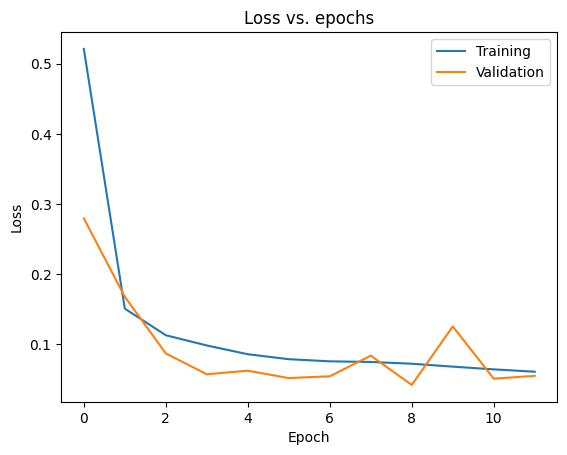

In [17]:
# I plotted the loss for both training and validation to make sure we have avoided overfitting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()


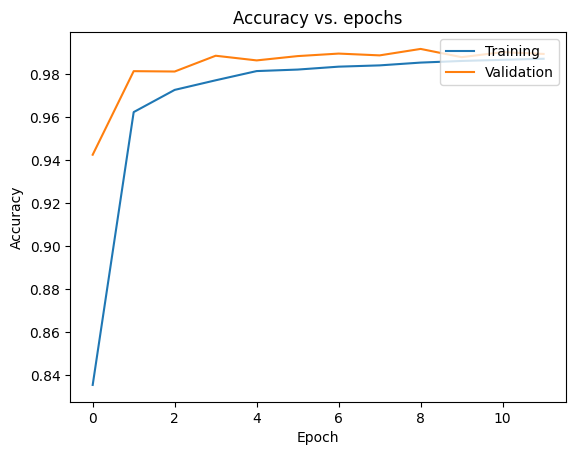

In [18]:
# I've also done the same with accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

In [19]:
#Finally I evaluate the perfomance of our model on the test set:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 3s 9ms/step - loss: 0.0572 - accuracy: 0.9869


[0.0571998655796051, 0.9868999719619751]

1/1 [==============================] - 0s 27ms/step


IndexError: ignored

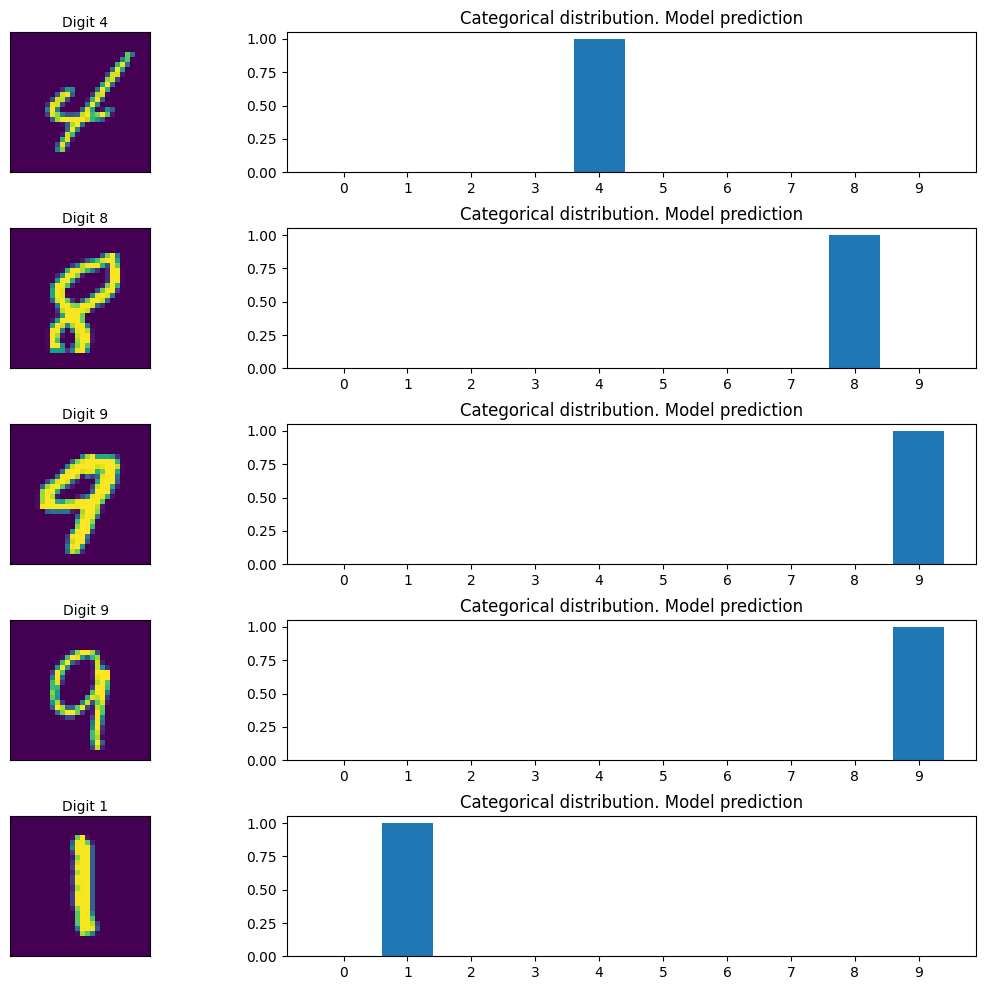

In [27]:
#Here I write this code to get 10 images random out of the test set and see the model's Categorical distribution and prediction alongside their real label
num_test_images = test_images.shape[0]

random_inx = np.random.choice(num_test_images, 10)
random_test_images = test_images[random_inx, ...]
random_test_labels = test_labels[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(5, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(0,10), prediction)
    axes[i, 1].set_xticks(np.arange(0,10))
    axes[i, 1].set_title("Categorical distribution. Model prediction")

plt.show()